
# Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

Exploring movie rating data from IMDb.


## Basic level

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [50]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Check the number of rows and columns.

In [51]:
# Answer: 

movies.shape

(979, 6)

#### Check the data type of each column.

In [52]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [53]:
# Answer:

movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [54]:
# Answer:

longest = movies.sort_values(['duration'], ascending = False).head(1)
shortest = movies.sort_values(['duration']).head(1)

print ("The shortest movie is", shortest['duration'].values[0], "minutes long")
print ("The longest movie is", longest['duration'].values[0], "minutes long")

The shortest movie is 64 minutes long
The longest movie is 242 minutes long


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5, 1.0, 'Movie Duration Distribution')

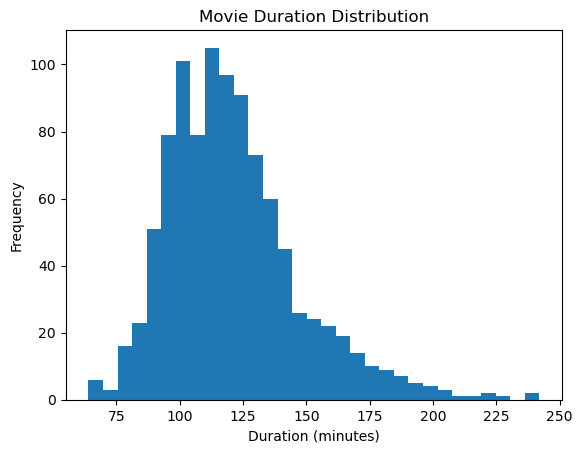

In [55]:
#Answer

#since "appropriate" number of bins is subjective, i tried it this way


num_bins = int(np.sqrt(len(movies['duration'])))
plt.hist(movies['duration'], bins=num_bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Movie Duration Distribution')

Text(0.5, 1.0, 'Movie Duration Distribution (no outliers)')

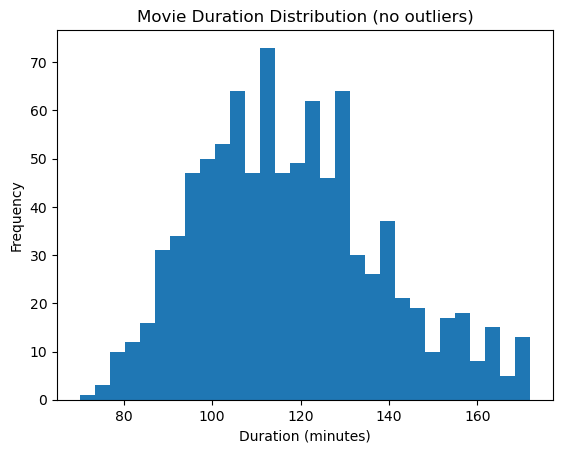

In [56]:
#I wanted to get rid of outliers... 

mean_duration = movies['duration'].mean()
std_dev_dur = movies['duration'].std()

upper_outlierlimit = mean_duration + std_dev_dur * 1.96
lower_outlierlimit = mean_duration - std_dev_dur * 1.96

#filtering out outliers from duration column

filter1 = (movies['duration'] < upper_outlierlimit) & (movies['duration'] > lower_outlierlimit)
new_movies = movies[filter1]

num_bins = int(np.sqrt(len(new_movies['duration'])))
plt.hist(new_movies['duration'], bins=num_bins)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Movie Duration Distribution (no outliers)')

#### Use a box plot to display that same data.

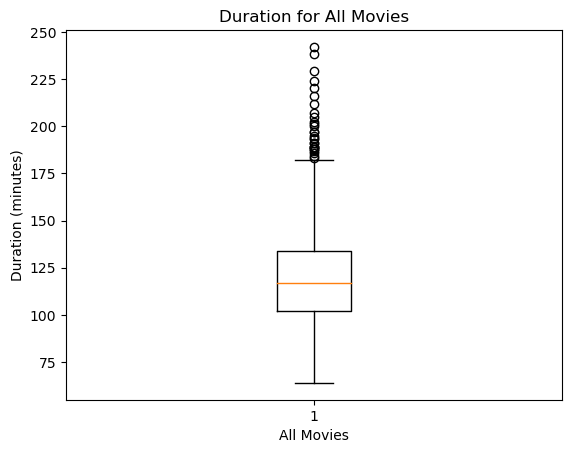

In [57]:
#Answer

#with outliers

plt.boxplot(movies['duration'])
plt.ylabel('Duration (minutes)')
plt.xlabel('All Movies')
plt.title('Duration for All Movies')
plt.show()

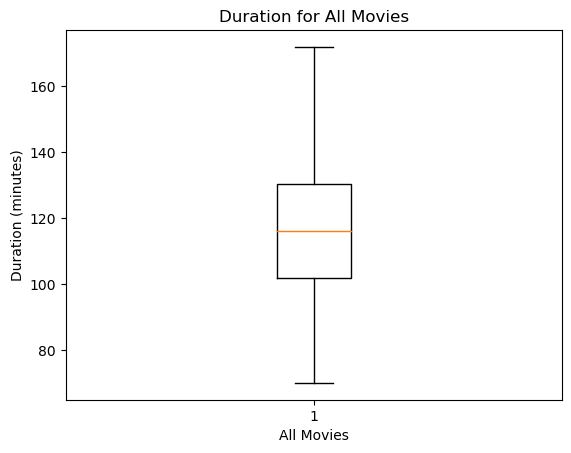

In [58]:
# Answer:

#outliers are excluded

plt.boxplot(new_movies['duration'])
plt.ylabel('Duration (minutes)')
plt.xlabel('All Movies')
plt.title('Duration for All Movies')
plt.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [59]:
# Answer:

movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

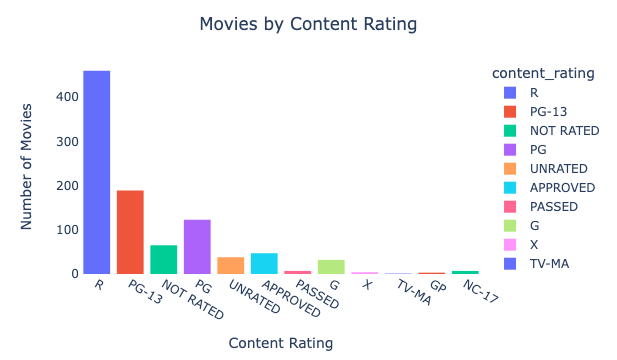

In [60]:
fig = px.histogram(movies, x='content_rating', color='content_rating')
fig.update_layout(plot_bgcolor='white',title='Movies by Content Rating',title_x=0.5)
fig.update_xaxes(title='Content Rating')
fig.update_yaxes(title='Number of Movies')

fig.show()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [61]:
# Answer:

ratings_to_replace = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']
replacement = 'UNRATED'

movies['content_rating'] = movies['content_rating'].replace(ratings_to_replace, replacement)
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

### Convert the following content ratings to "NC-17": X, TV-MA.

In [62]:
# Answer:

ratings_to_replace = ['X', 'TV-MA']
replacement = 'NC-17'

movies['content_rating'] = movies['content_rating'].replace(ratings_to_replace, replacement)
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

#### Count the number of missing values in each column.

In [63]:
# Answer:

#movies['content_rating']['nan'].count()

missing_values = movies.isna().sum()
print(missing_values)

missing_values_count = movies['content_rating'].isna().sum()
print ('There are', missing_values_count, 'missing values')

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64
There are 3 missing values


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [64]:
# Answer:

missing_values = movies.isna().sum()
print(missing_values)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


In [65]:
#I think adding them to the UNRATED group may be reasonable

movies = movies.fillna('UNRATED')

In [66]:
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17'], dtype=object)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [67]:
# Answer:
longer_movies = movies[movies['duration'] >= 120]
result1 = longer_movies['star_rating'].mean()
print ('The average star rating for movies 2 hours or longer is ' + str(round(result1,2)))

shorter_movies = movies[movies['duration'] < 120]
result2 = shorter_movies['star_rating'].mean()
print ('The average star rating for movies shorter than 2 hours is ' + str(round(result2,2)))

if result1 > result2:
    percentage = ((result1 - result2) / result1) * 100
    rounded_percentage = round(percentage, 2)
    diff = round((result1 - result2),2)
    print ('The average star rating for movies 2 hours or longer is '+str(diff) + ' or '  + str(rounded_percentage) + '% greater than that of shorter movies')
else:
    percentage = ((result2 - result1) / result2) * 100
    rounded_percentage = round(percentage, 2)
    diff = round((result2 - result1),2)
    print ('The average star rating for movies 2 hours or longer is '+str(result2 - result1) + ' or ' + str(rounded_percentage) + '% less than that of shorter movies')

The average star rating for movies 2 hours or longer is 7.95
The average star rating for movies shorter than 2 hours is 7.84
The average star rating for movies 2 hours or longer is 0.11 or 1.39% greater than that of shorter movies


#### Use a visualization to detect whether there is a relationship between duration and star rating.

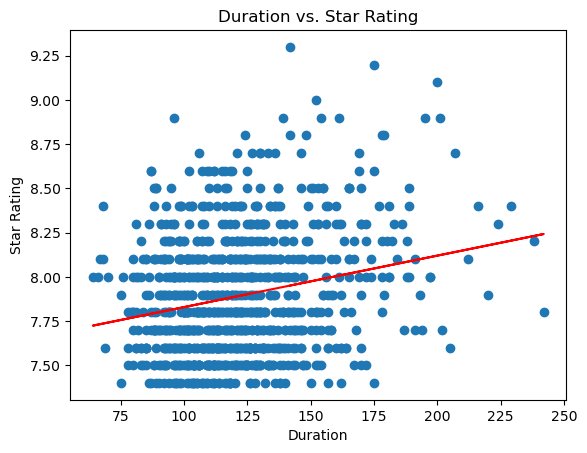

In [68]:
# Answer:

#correlation = movies['duration'].corr(movies['star_rating'])

plt.scatter(movies['duration'], movies['star_rating'])
plt.xlabel('Duration')
plt.ylabel('Star Rating')
plt.title('Duration vs. Star Rating')

x = movies['duration']
y = movies['star_rating']

#trendline

coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = intercept + slope * x


plt.plot(x, regression_line, color='red')


plt.show()

#### Calculate the average duration for each genre.

In [69]:
# Answer:

av_dur = movies.groupby('genre')['duration'].mean().reset_index().rename(
    columns={'duration':'average duration'})
av_dur

,genre,average duration
0,Action,126.485294
1,Adventure,134.840000
2,Animation,96.596774
3,Biography,131.844156
4,Comedy,107.602564
5,Crime,122.298387
6,Drama,126.539568
7,Family,107.500000
8,Fantasy,112.000000
9,Film-Noir,97.333333


## Advanced level

#### Visualize the relationship between content rating and duration.

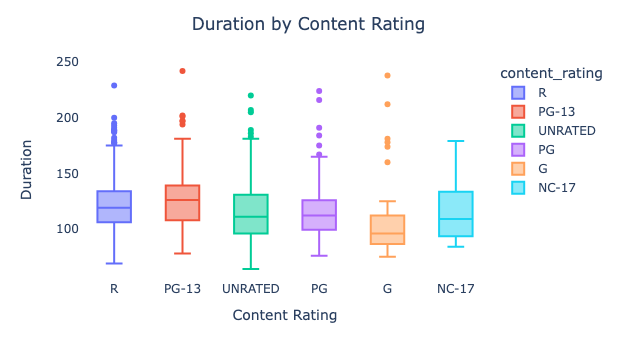

In [70]:
# Answer:

fig = px.box(movies, x='content_rating', y='duration', color='content_rating')
fig.update_layout(plot_bgcolor='white',title='Duration by Content Rating',title_x=0.5)

fig.update_xaxes(title='Content Rating')
fig.update_yaxes(title='Duration')

fig.show()

#### Determine the top rated movie (by star rating) for each genre.

In [71]:
# Answer:

#index of the maximum 'star_rating' within each group
top_moviesid = movies.groupby('genre')['star_rating'].idxmax()
top_movies = movies.loc[top_moviesid, ['genre', 'star_rating', 'title']]
top_movies

,genre,star_rating,title
3,Action,9.0,The Dark Knight
7,Adventure,8.9,The Lord of the Rings: The Return of the King
30,Animation,8.6,Spirited Away
8,Biography,8.9,Schindler's List
25,Comedy,8.6,Life Is Beautiful
0,Crime,9.3,The Shawshank Redemption
5,Drama,8.9,12 Angry Men
468,Family,7.9,E.T. the Extra-Terrestrial
638,Fantasy,7.7,The City of Lost Children
105,Film-Noir,8.3,The Third Man


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [72]:
# Answer:

duplicate_sum = movies['title'].duplicated().sum()
if duplicate_sum >0:
    print ('There are ' + str(duplicate_sum) + ' duplicate titles')
else:
    print ('No duplicate titles')

duplicate_titles = movies[movies['title'].duplicated(keep=False)]
identical_titles = duplicate_titles['title'].unique()

for title in identical_titles:
        print(title)


There are 4 duplicate titles
The Girl with the Dragon Tattoo
True Grit
Les Miserables
Dracula


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [73]:
# Answer:
moviescount = movies['genre'].value_counts().reset_index()
#print (moviescount)
nums = movies[movies['genre'].isin(moviescount[moviescount['genre'] > 10]['index'])]
average_rating = nums.groupby('genre')['star_rating'].mean().reset_index().rename(
    columns={'star_rating':'average star rating'})

print(average_rating)

       genre  average star rating
0     Action             7.884559
1  Adventure             7.933333
2  Animation             7.914516
3  Biography             7.862338
4     Comedy             7.822436
5      Crime             7.916935
6      Drama             7.902518
7     Horror             7.806897
8    Mystery             7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [74]:
movies['actors_list']

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [75]:
import ast
from collections import defaultdict

# Assuming 'movies' is a pandas DataFrame with a column 'actors_list'
actor_counts = defaultdict(int)

for actors_list_str in movies['actors_list']:
    actors_list = ast.literal_eval(actors_list_str)
    for actor in actors_list:
        actor_counts[actor] += 1
    
sorted_actors = sorted(actor_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top ten most frequent actors
print ("Ten actors most frequently casted:")
for actor, count in sorted_actors[:10]:
    print(actor, "- frequency:", count)

Ten actors most frequently casted:
Robert De Niro - frequency: 18
Clint Eastwood - frequency: 14
Brad Pitt - frequency: 14
Tom Hanks - frequency: 14
Al Pacino - frequency: 13
Johnny Depp - frequency: 12
Christian Bale - frequency: 11
Leonardo DiCaprio - frequency: 11
Dustin Hoffman - frequency: 11
Harrison Ford - frequency: 10
